# Inlet Profiles - Exercise

## Exercise 1

Create the following flow profile:

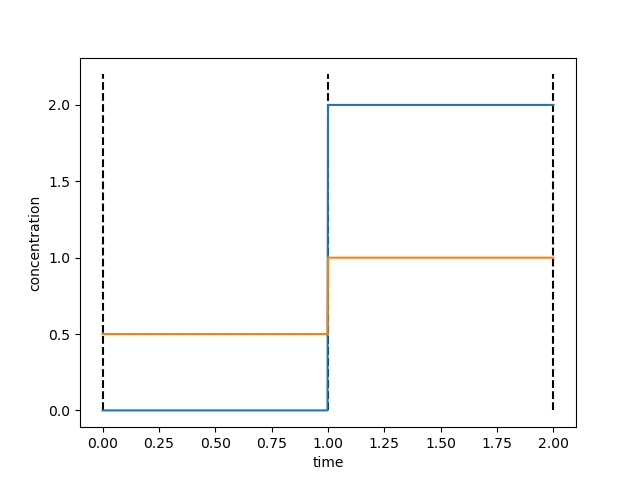

Assume a flow rate of $Q = 1\cdot mL\cdot min^{-1}$

***Hint:*** We need to specify a second component for the template function and then pass a list of to the concentration parameter.

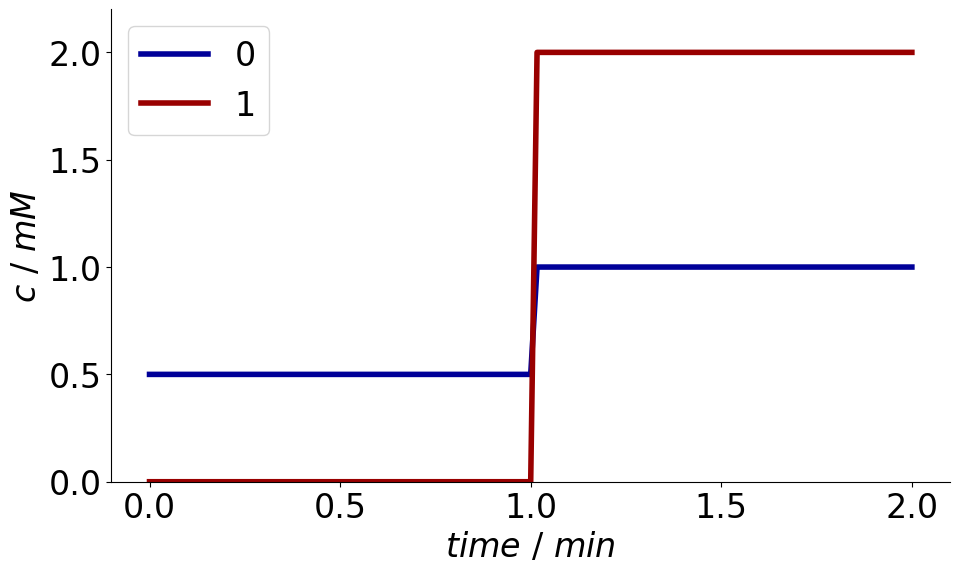

In [1]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(2)

from CADETProcess.processModel import Inlet
inlet = Inlet(component_system, 'inlet')
inlet.flow_rate = 1e-6/60

from CADETProcess.processModel import Outlet
outlet = Outlet(component_system, 'outlet')

from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet, outlet)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'flow_exercise_1')
process.cycle_time = 120

process.add_event('load', 'flow_sheet.inlet.c', [0.5, 0])
process.add_event('wash', 'flow_sheet.inlet.c', [1, 2], 60)

from CADETProcess.simulator import Cadet
simulator = Cadet()

simulation_results = simulator.simulate(process)

_ = simulation_results.solution.outlet.inlet.plot()

## Exercise 2

Create the following inlet profile:

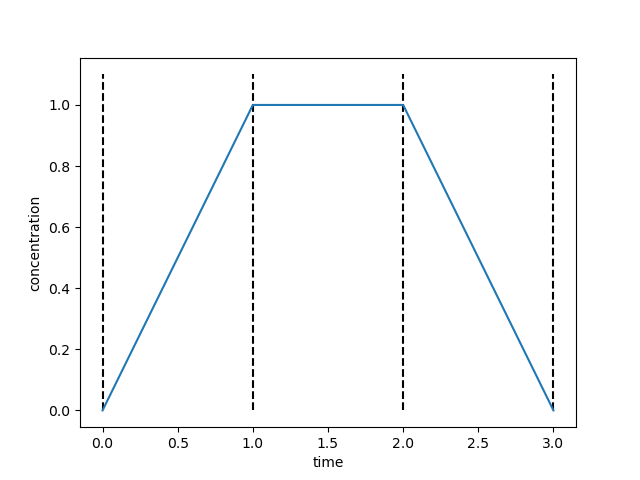

Assume a flow rate of $Q = 1\cdot mL\cdot min^{-1}$

***Hint:*** We need three `Events` and for linear gradients, the concentration for each component needs to be passed as a list of cubic polynomial coefficients.

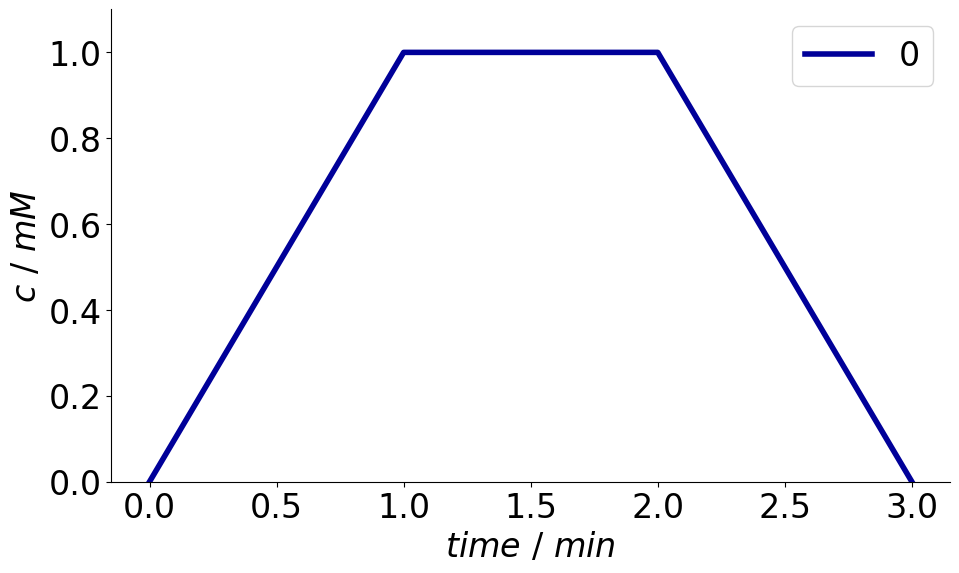

In [2]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(1)

from CADETProcess.processModel import Inlet
inlet = Inlet(component_system, 'inlet')
inlet.flow_rate = 1e-6/60

from CADETProcess.processModel import Outlet
outlet = Outlet(component_system, 'outlet')

from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet, outlet)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'flow_exercise_2')
process.cycle_time = 180

process.add_event('load', 'flow_sheet.inlet.c', [[0,1/60]], 0)
process.add_event('wash', 'flow_sheet.inlet.c', [[1]], 60)
process.add_event('elute', 'flow_sheet.inlet.c', [[1,-1/60]], 120)

from CADETProcess.simulator import Cadet
simulator = Cadet()

simulation_results = simulator.simulate(process)

_ = simulation_results.solution.outlet.inlet.plot()

## Bonus Exercise: Changing the system connectivity

Instead of creating inlet profiles by modifying the concentration profile of a single `Inlet` unit operation, the same effect can also be achieved by assuming multiple `Inlets`, each with a constant concentration and changing the flow rates of the system.

***Task:*** Creating a system with a second `Inlet` and recreate the previous examples.

### Example 1

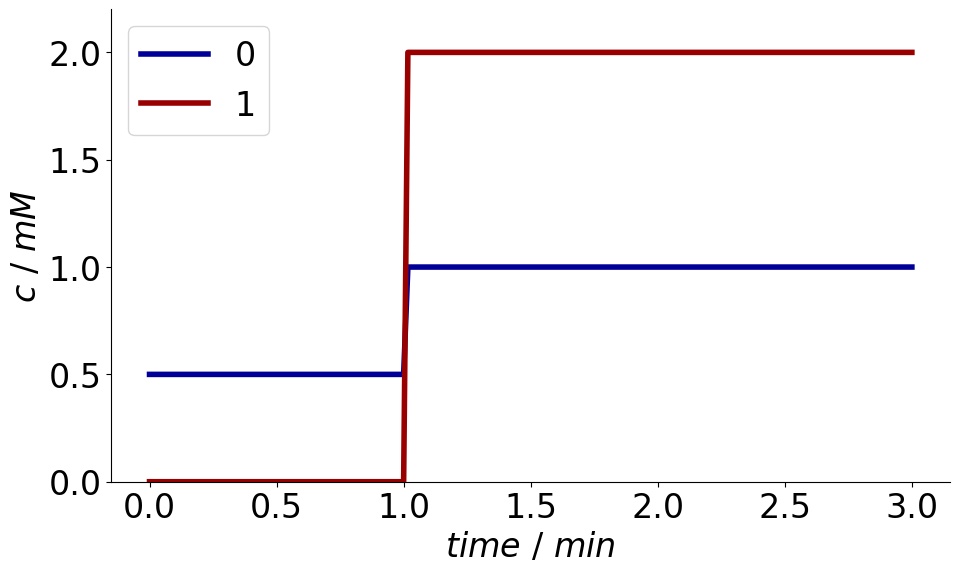

In [3]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(2)

from CADETProcess.processModel import Inlet

inlet_1 = Inlet(component_system, 'inlet_1')
inlet_1.c = [0.5, 0]

inlet_2 = Inlet(component_system, 'inlet_2')
inlet_2.c = [1, 2]

from CADETProcess.processModel import Outlet
outlet = Outlet(component_system, 'outlet')

from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet_1)
flow_sheet.add_unit(inlet_2)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet_1, outlet)
flow_sheet.add_connection(inlet_2, outlet)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'flow_exercise_1_dyn_flow')
process.cycle_time = 180

process.add_event('inlet_1_on', 'flow_sheet.inlet_1.flow_rate', 1e-6/60, 0)
process.add_event('inlet_2_off', 'flow_sheet.inlet_2.flow_rate', 0, 0)
process.add_event('inlet_1_off', 'flow_sheet.inlet_1.flow_rate', 0, 60)
process.add_event('inlet_2_on', 'flow_sheet.inlet_2.flow_rate', 1e-6/60, 60)

from CADETProcess.simulator import Cadet
simulator = Cadet()

simulation_results = simulator.simulate(process)

# _ = simulation_results.solution.inlet_1.outlet.plot()
# _ = simulation_results.solution.inlet_2.outlet.plot()
_ = simulation_results.solution.outlet.inlet.plot()

### Example 2

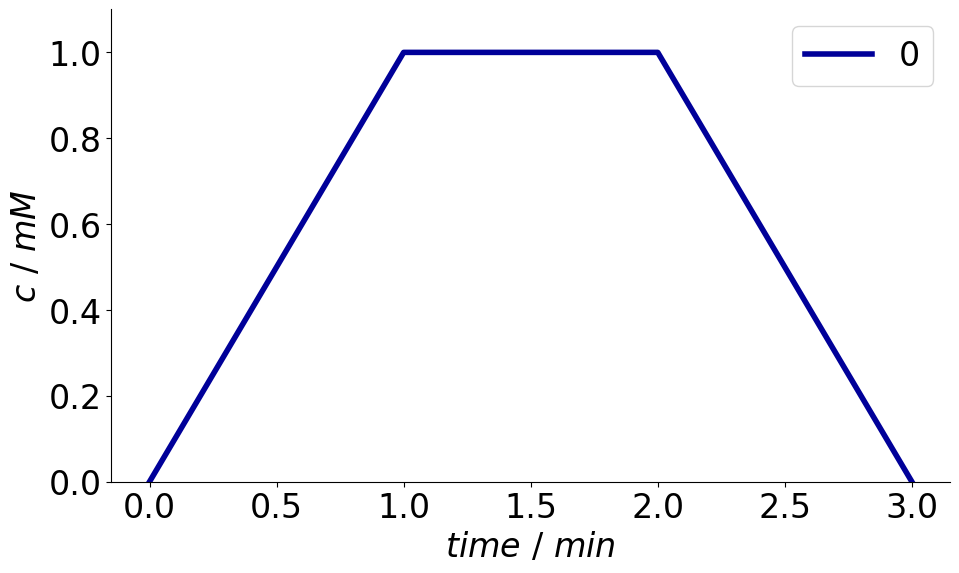

In [4]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(1)

from CADETProcess.processModel import Inlet

inlet_1 = Inlet(component_system, 'inlet_1')
inlet_1.c = [1]

inlet_2 = Inlet(component_system, 'inlet_2')
inlet_2.c = [0]

from CADETProcess.processModel import Outlet
outlet = Outlet(component_system, 'outlet')

from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet_1)
flow_sheet.add_unit(inlet_2)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet_1, outlet)
flow_sheet.add_connection(inlet_2, outlet)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'flow_exercise_2_dyn_flow')
process.cycle_time = 180

Q = 1e-6/60
process.add_event('first_grad_1', 'flow_sheet.inlet_1.flow_rate', [0, Q/60], 0)
process.add_event('first_grad_2', 'flow_sheet.inlet_2.flow_rate', [Q, -Q/60], 0)

process.add_event('start_plateau_1', 'flow_sheet.inlet_1.flow_rate', Q, 60)
process.add_event('start_plateau_2', 'flow_sheet.inlet_2.flow_rate', 0, 60)

process.add_event('second_grad_1', 'flow_sheet.inlet_1.flow_rate', [Q, -Q/60], 120)
process.add_event('second_grad_2', 'flow_sheet.inlet_2.flow_rate', [0, Q/60], 120)


from CADETProcess.simulator import Cadet
simulator = Cadet()

simulation_results = simulator.simulate(process)

_ = simulation_results.solution.outlet.inlet.plot()